## Import libraries

In [1]:
import os
import h5py
import netCDF4
import numpy as np
import pandas as pd
import configparser
import matplotlib.pyplot as plt

from modules import fy3e_l1_add_georeferencing

### Read config

In [2]:
config = configparser.ConfigParser()
config.read('file_paths.ini')
config.sections()

['MAIN_DATA_PATH', 'FY3', 'HIMAWARI']

In [3]:
# File paths for FengYun-3E data.
FY3E_DATA_FOLDERS_LOCATION = config['FY3']['FY3E_MAIN_DATA_LOCATION']
FY3E_L0_DATA_LOCATION = config['FY3']['FY3E_L0_DATA_LOCATION']
FY3E_L1_DATA_LOCATION = config['FY3']['FY3E_L1_DATA_LOCATION']
FY3E_L1_GOE_DATA_LOCATION = config['FY3']['FY3E_L1_GOE_DATA_LOCATION']
FY3E_L1_IMAGE_DATA_LOCATION = config['FY3']['FY3E_L1_IMAGE_DATA_LOCATION']
FY3E_L1_GEOREF_IMAGE_DATA_LOCATION = config['FY3']['FY3E_L1_GEOREF_IMAGE_DATA_LOCATION']

In [4]:
fy3e_l1_geo_files_paths = [FY3E_L1_GOE_DATA_LOCATION + file_name for file_name in os.listdir(FY3E_L1_GOE_DATA_LOCATION)]
fy3e_l1_image_files_paths = [FY3E_L1_IMAGE_DATA_LOCATION + file_name for file_name in os.listdir(FY3E_L1_IMAGE_DATA_LOCATION)]

print('GEO files -', fy3e_l1_geo_files_paths)
print()
print('Image files -', fy3e_l1_image_files_paths)

GEO files - ['E:/Satellite data/FY-3E/L1/geo/FY3E_MERSI_GRAN_L1_20230228_2215_GEOQK_V0.HDF']

Image files - ['E:/Satellite data/FY-3E/L1/image/FY3E_MERSI_GRAN_L1_20230228_2215_0250M_V0.HDF']


In [5]:
data = h5py.File(fy3e_l1_image_files_paths[0])

In [6]:
data.keys()

<KeysViewHDF5 ['Calibration', 'Data', 'Geolocation', 'QA']>

### Crop useless data

In [7]:
raw_data = np.array(data['Data']['EV_250_Emissive_b6'])[:, :6132]

In [16]:
SECTORS = 292
SENSORS_COUNT = 40

slices_data = []

for i in range(raw_data.shape[0] // SENSORS_COUNT):
    cols = []
    
    for j in range(raw_data.shape[1] // SECTORS):
        np.array(cols.append(raw_data[i * SENSORS_COUNT: SENSORS_COUNT + (i * SENSORS_COUNT), j * SECTORS: SECTORS + (j * SECTORS)]))
    
    slices_data.append(cols)

slices_data = np.array(slices_data)

In [19]:
slices_data.shape

(200, 21, 40, 292)

In [25]:
slices_data[0][0].shape

(40, 292)

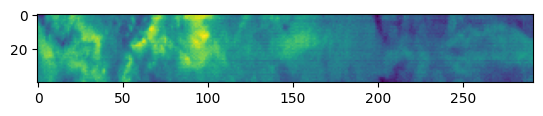

In [24]:
plt.imshow(slices_data[0][0])

TODO

slices_data = np.array(slices_data)

In [38]:
x, y = 4152, 1271

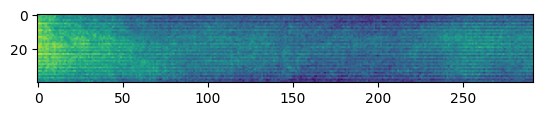

In [39]:
plt.imshow(slices_data[y // SENSORS_COUNT, x // SECTORS])

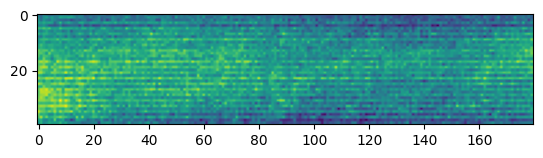

In [49]:
plt.imshow(slices_data[y // SENSORS_COUNT, x // SECTORS][:, 60:240])

In [58]:
area = slices_data[y // SENSORS_COUNT, x // SECTORS][:, 60:240]

In [61]:
area.shape

(40, 180)

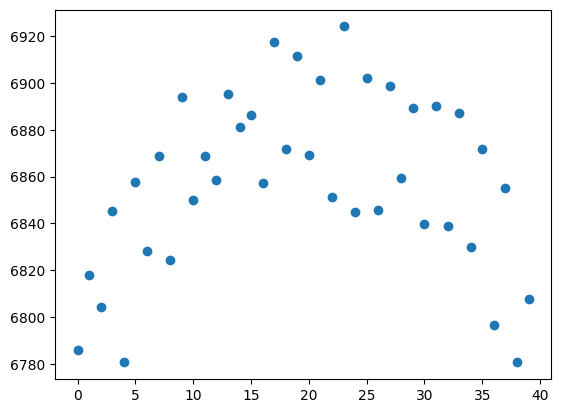

In [59]:
plt.scatter(np.arange(40), np.mean(area, axis=1))

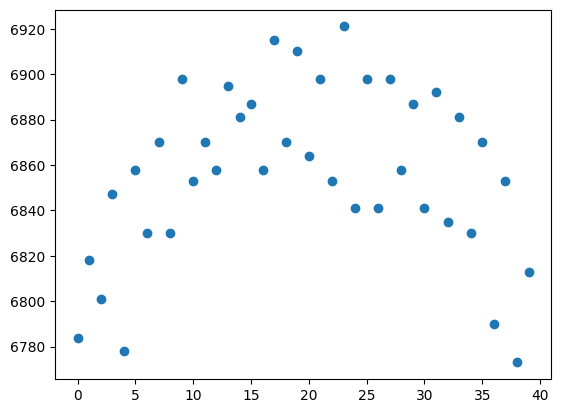

In [60]:
plt.scatter(np.arange(40), np.median(area, axis=1))

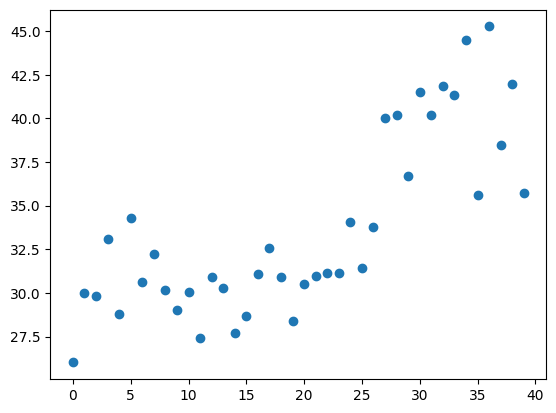

In [62]:
plt.scatter(np.arange(40), np.std(area, axis=1))